In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [23]:
df = pd.read_csv("../../data/processed/Roommate_Compatibility_Survey.csv")
df.head()

,Gender,Faculty,Religion,Parents_Abroad,Living_with_Parents,Do_you_smoke,Attitude_towards_Roommate_Smoking,Preferred_Roommate_Relationship_Type,Ideal_Study_Environment_Description,Attitude_towards_Borrowing_Sharing,...,Being loud when I’m studying/sleeping,Eating my food,Not picking up after themselves,Being unfriendly,Lack of respect for me and my privacy,Not being open-minded,Bad personal hygiene,Using my things without asking,Having guests over too much,Messy
0,1,2,1,0,1,0,2,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0,2,1,1,0,0,2,0,1,1,...,0,0,1,0,1,0,1,1,0,0
2,0,2,1,0,1,0,0,1,1,1,...,0,0,1,0,1,0,0,0,0,0
3,0,2,1,0,1,0,2,1,1,1,...,0,0,1,1,1,0,0,0,0,0
4,0,2,1,0,1,0,1,0,1,2,...,0,0,1,0,1,0,0,0,0,1


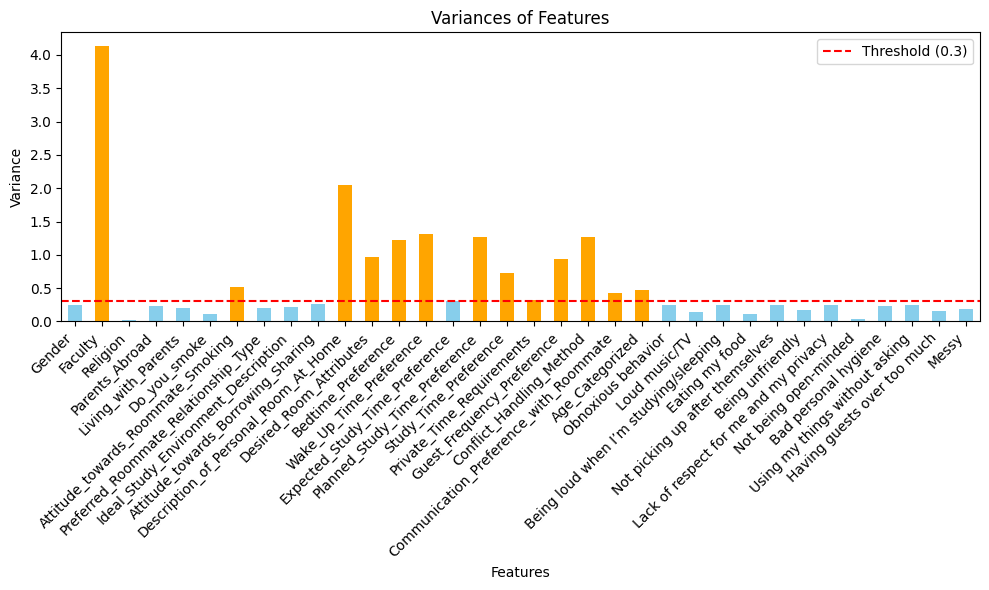

In [24]:
import matplotlib.pyplot as plt

# Define the threshold
threshold = 0.3 # Adjust the threshold as needed

# Calculate variances of the features
variances = df.var()

# Plot the variances
plt.figure(figsize=(10, 6))
variances.plot(kind='bar', color=['skyblue' if var < threshold else 'orange' for var in variances])
plt.title('Variances of Features')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold})')
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
# Define the threshold
threshold = 0.3 

variances = df.var()

low_threshold_columns = variances[variances < threshold]
high_threshold_columns = variances[variances >= threshold]

print("Columns with variances below the threshold (<", threshold, "):")
print(low_threshold_columns)

print("\nColumns with variances equal to or above the threshold (>= ", threshold, "):")
print(high_threshold_columns)


Columns with variances below the threshold (< 0.3 ):
Gender                                   0.248358
Religion                                 0.019374
Parents_Abroad                           0.237901
Living_with_Parents                      0.207276
Do_you_smoke                             0.110127
Preferred_Roommate_Relationship_Type     0.202188
Ideal_Study_Environment_Description      0.212334
Attitude_towards_Borrowing_Sharing       0.264433
Expected_Study_Time_Preference           0.299462
Obnoxious behavior                       0.245371
Loud music/TV                            0.135897
Being loud when I’m studying/sleeping    0.242756
Eating my food                           0.110547
Not picking up after themselves          0.244764
Being unfriendly                         0.170318
Lack of respect for me and my privacy    0.239644
Not being open-minded                    0.034313
Bad personal hygiene                     0.230821
Using my things without asking           0.2453

In [26]:
filtered_df = df[high_threshold_columns.index]
filtered_df.head()

,Faculty,Attitude_towards_Roommate_Smoking,Description_of_Personal_Room_At_Home,Desired_Room_Attributes,Bedtime_Preference,Wake_Up_Time_Preference,Planned_Study_Time_Preference,Study_Time_Preference,Private_Time_Requirements,Guest_Frequency_Preference,Conflict_Handling_Method,Communication_Preference_with_Roommate,Age_Categorized
0,2,2,0,0,1,4,2,0,1,1,3,0,1
1,2,2,0,0,2,1,1,0,2,3,2,0,0
2,2,0,3,0,2,1,2,2,2,4,2,0,1
3,2,2,0,0,2,0,3,1,0,2,2,0,1
4,2,1,3,0,2,2,3,0,1,1,3,0,0


In [27]:
filtered_df.columns

Index(['Faculty', 'Attitude_towards_Roommate_Smoking',
       'Description_of_Personal_Room_At_Home', 'Desired_Room_Attributes',
       'Bedtime_Preference', 'Wake_Up_Time_Preference',
       'Planned_Study_Time_Preference', 'Study_Time_Preference',
       'Private_Time_Requirements', 'Guest_Frequency_Preference',
       'Conflict_Handling_Method', 'Communication_Preference_with_Roommate',
       'Age_Categorized'],
      dtype='object')

In [28]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler to the data and transform the data
scaled_data = scaler.fit_transform(filtered_df)

# Convert scaled data back to a DataFrame (optional)
scaled_df = pd.DataFrame(scaled_data, columns=filtered_df.columns)

scaled_df.head()

,Faculty,Attitude_towards_Roommate_Smoking,Description_of_Personal_Room_At_Home,Desired_Room_Attributes,Bedtime_Preference,Wake_Up_Time_Preference,Planned_Study_Time_Preference,Study_Time_Preference,Private_Time_Requirements,Guest_Frequency_Preference,Conflict_Handling_Method,Communication_Preference_with_Roommate,Age_Categorized
0,0.25,1.0,0.0,0.0,0.333333,1.00,0.666667,0.0,0.5,0.25,1.000000,0.0,0.5
1,0.25,1.0,0.0,0.0,0.666667,0.25,0.333333,0.0,1.0,0.75,0.666667,0.0,0.0
2,0.25,0.0,1.0,0.0,0.666667,0.25,0.666667,1.0,1.0,1.00,0.666667,0.0,0.5
3,0.25,1.0,0.0,0.0,0.666667,0.00,1.000000,0.5,0.0,0.50,0.666667,0.0,0.5
4,0.25,0.5,1.0,0.0,0.666667,0.50,1.000000,0.0,0.5,0.25,1.000000,0.0,0.0


In [29]:
scaled_df.to_csv('../../data/final/Roommate_Compatibility_Survey.csv', index=False)